In [ ]:
# tensorflow 버전 확인
import tensorflow as tf
tf.__version__

'2.2.0'

In [ ]:
# 내 구글 드라이버에 연동
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# 필요한 패키지와 모듈을 불러옴
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_height = 150  # 이미지 높이
image_width = 150   # 이미지 넓이
batch_size = 10     # batch size
no_of_epochs  = 30  # trining 횟수

In [ ]:
# 저장해 뒀던 모델을 불러옵니다.
new_model = load_model('gdrive/My Drive/CV/Diagnose Pneumonia/diagnose_pneumonia_model.h5')

new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0

In [ ]:
# ImageDataGenerator 클래스를 통해 train_datagen 인스턴스를 만듭니다.
train_datagen = ImageDataGenerator(rescale=1./255,     # 픽셀 값을 0~1 범위로 변환
                                   rotation_range=15,  # 15도까지 회전
                                   shear_range=0.2,    # 20%까지 기울임 
                                   zoom_range=0.2      # 20%까지 확대
                                   )

val_datagen = ImageDataGenerator(rescale=1./255)       # 픽셀 값을 0~1 범위로 변환

In [ ]:
# train_datagen 인스턴스를 통해 trin dataset 에서 한번에 batch_size 만큼 이미지를 만들어내는 training_set 객체를 생성한다.
training_set = train_datagen.flow_from_directory('gdrive/My Drive/CV/Diagnose Pneumonia/chest_xray/chest_xray/train',
                                                 target_size=(image_width, image_height),
                                                 batch_size=batch_size,
                                                 class_mode='binary')

# val_datagen 인스턴스를 통해 test dataset 에서 한번에 batch_size 만큼 이미지를 만들어내는 test_set 객체를 생성한다.
test_set = val_datagen.flow_from_directory('gdrive/My Drive/CV/Diagnose Pneumonia/chest_xray/chest_xray/test',
                                            target_size=(image_width, image_height),
                                            batch_size=batch_size,
                                            class_mode='binary')

# val_datagen 인스턴스를 통해 val dataset 에서 한번에 batch_size 만큼 이미지를 만들어내는 val_set 객체를 생성한다.
val_set = val_datagen.flow_from_directory('gdrive/My Drive/CV/Diagnose Pneumonia/chest_xray/chest_xray/val',
                                            target_size=(image_width, image_height),
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
# model evaluate(모델을 평가해 봅니다)
score = new_model.evaluate(test_set, steps=624//batch_size, verbose=1)
print('Val loss:', score[0])
print('Val accuracy:', score[1]*100)

62/62 [==============================] - 292s 5s/step - loss: 0.2800 - accuracy: 0.8871
Val loss: 0.28001052141189575
Val accuracy: 88.70967626571655


In [ ]:
# val_set 이 만들어낸 이미지를 우리가 만든 모델을 통해 분류 예측해 봅니다.
predictions = new_model.predict(val_set, steps=16, verbose=1)

16/16 [==============================] - 8s 469ms/step


In [ ]:
# predictions shape 확인
predictions.shape

(16, 1)

In [ ]:
# 예측결과 확인
predictions

array([[0.11257386],
       [0.07041258],
       [0.24821515],
       [0.41185346],
       [0.305774  ],
       [0.23384574],
       [0.17056787],
       [0.08848722],
       [0.86522144],
       [0.9356681 ],
       [0.93396777],
       [0.50558543],
       [0.8572502 ],
       [0.83369845],
       [0.09414413],
       [0.8612506 ]], dtype=float32)

In [ ]:
# val_set 이 만들어 내는 이미지의 클래스 인덱스가 무엇인지 확인해 본다.
print(val_set.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


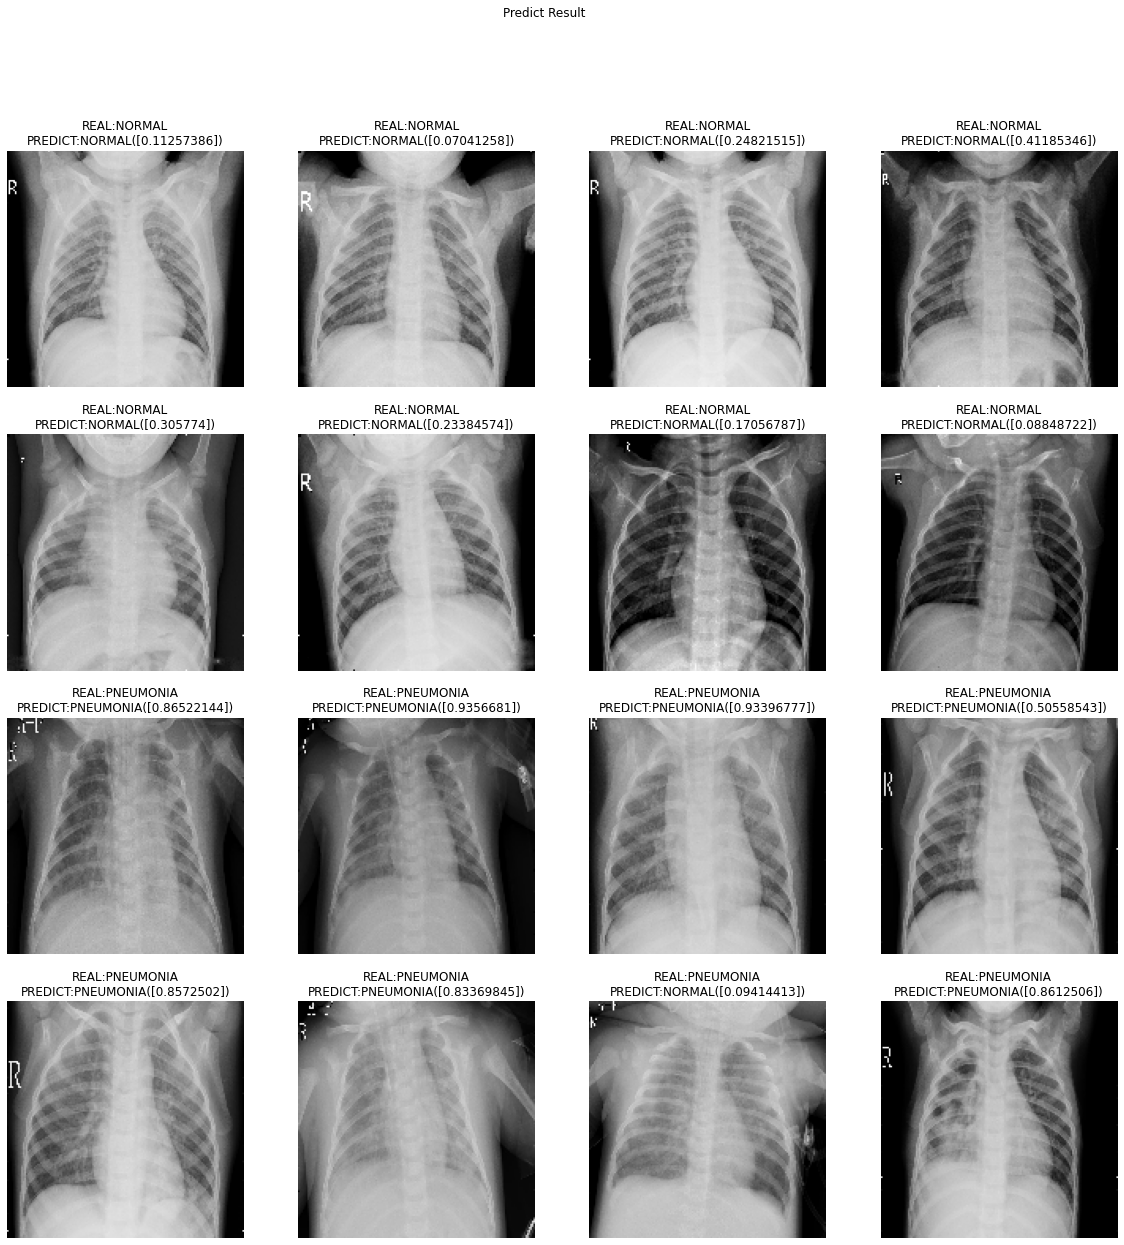

In [ ]:
# Predict Result(val_set 가 만들어 낸 이미지를 우리가 만든 모델을 통해 예측한 결과를 보여줍니다.)
f,ax = plt.subplots(4,4,figsize=(20,20))

for i in range(len(predictions)):
    image, label = val_set.next()                                  # val_set 이 만들어 낸 이미지를 하나씩 꺼내온다
    real_class = 'NORMAL' if int(label) == 0 else 'PNEUMONIA'      # val_set 이 만들어 낸 이미지의 label name 을 가져옴
    ax[i//4,i%4].imshow(image[0])                                  # val_set 이 만들어 낸 이미지를 보여줌
    ax[i//4,i%4].axis('off')

    pred_class = 'PNEUMONIA' if predictions[i] > 0.5 else 'NORMAL' # val_set 이 만들어 낸 이미지를 모델을 통해 예측한 결과 값의 label name
    pred_prob = predictions[i]                                     # val_set 이 만들어 낸 이미지를 모델을 통해 예측한 결과(확률값)
    ax[i//4,i%4].set_title('REAL:' + real_class + '\nPREDICT:' + pred_class + '(' + str(pred_prob) + ')')   # title 에 실제값과 모델에 의해 예측된 예측값을 함께 보여준다.

f.suptitle('Predict Result')

plt.show()